In [1]:
import pandas as pd
import numpy as np

In [2]:
data_uni = pd.read_excel("Data Uni Dissertation.xlsx")

#data_uni

In [8]:
# Dealing with  inconsistent values

def trimmer(df):
    column_list = []

    for (columnName, columnData) in df.iteritems():
       
        if columnData.dtype == "object":

            df_replace = columnData.str.strip()

            column_list.append(df_replace)
        else:
            column_list.append(columnData)
            

    return (pd.DataFrame(column_list))

trimmer(data_uni)


,0,1,2,3,4,5,6,7,8,9,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032
Course,BA Business Manangement Enterpreneurship and I...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management Marketing,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management,...,BA,BA,BA,BA,BA,BA,BA,BA,BA,BA
UCAS,no,no,no,no,no,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,no,no,no
25 Above,no,no,no,yes,no,no,no,no,no,no,...,no,yes,no,yes,yes,no,no,yes,yes,yes
Disability,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
Ethnicity,Asian,White,Asian,White,White,Asian,White,White,White,White,...,Asian,White,NaN,NaN,NaN,Other ethnic background,NaN,Asian,Other ethnic background,Other ethnic background
Gender,Male,Male,Male,Female,Male,Male,Male,Male,Male,Female,...,Male,Male,Male,Female,Male,Female,Male,Female,Male,Female
British,no,no,yes,no,yes,yes,no,yes,yes,yes,...,no,yes,yes,no,yes,no,yes,no,no,no
English native Language,no,no,yes,no,yes,yes,yes,yes,yes,yes,...,no,NaN,NaN,no,no,yes,yes,no,no,no
Parent He attendance,yes,yes,yes,no,yes,yes,no,no,no,no,...,yes,no,yes,yes,yes,no,yes,no,yes,no
Polar_4_Score,4.0,2.0,4.0,3.0,4.0,3.0,5.0,4.0,2.0,NaN,...,5.0,3.0,4.0,3.0,2.0,1.0,4.0,1.0,4.0,NaN


In [10]:
# creating a new df after trimming 
data_uni_df = trimmer(data_uni)
data_uni_df = data_uni_df.transpose( copy = True)
print(data_uni_df.info())

#saving the new data frame
data_uni_df.to_csv("data_uni.csv", index = False)
data_uni_2 = pd.read_csv("data_uni.csv")
data_uni_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Course                      1031 non-null   object
 1   UCAS                        1033 non-null   object
 2   25 Above                    1033 non-null   object
 3   Disability                  1033 non-null   object
 4   Ethnicity                   1020 non-null   object
 5   Gender                      1033 non-null   object
 6   British                     962 non-null    object
 7   English native Language     964 non-null    object
 8   Parent He attendance        996 non-null    object
 9   Polar_4_Score               915 non-null    object
 10  SLC                         1033 non-null   object
 11  Care Leaver                 875 non-null    object
 12  Student Visa                964 non-null    object
 13  Refugee                     1026 non-null   obje

In [11]:
data_uni_2.iloc[:, [24,25,29]]= data_uni_2.iloc[:, [24,25,29]].fillna(0)
#data_uni_2.isna().sum()

In [12]:
column_miss= list(data_uni_2.columns[data_uni_2.isnull().any()])
column_miss

['Course',
 'Ethnicity',
 'British',
 'English native Language',
 'Parent He attendance',
 'Polar_4_Score',
 'Care Leaver',
 'Student Visa',
 'Refugee',
 'London Permanent Residence',
 'UCAS Points',
 'English',
 'Maths',
 'A Levels',
 'Btec',
 'Previous work',
 'Bursary']

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_uni_2[column_miss]= imputer.fit_transform(data_uni_2[column_miss])

In [14]:
data_uni_2.isna().sum()

Course                        0
UCAS                          0
25 Above                      0
Disability                    0
Ethnicity                     0
Gender                        0
British                       0
English native Language       0
Parent He attendance          0
Polar_4_Score                 0
SLC                           0
Care Leaver                   0
Student Visa                  0
Refugee                       0
London Permanent Residence    0
UCAS Points                   0
English                       0
Maths                         0
A Levels                      0
Btec                          0
Previous work                 0
Bursary                       0
Attendance                    0
AWM year 1                    0
AWM year 2                    0
AWM year 3                    0
Overall AWM                   0
Progression                   0
First Sit                     0
Second Sit                    0
Fails                         0
No Submi

In [15]:
data_uni_2= data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3", "Overall AWM"], axis = 1)

In [16]:
#ethinicty binarisation 

data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

#print(data_uni_2.Ethnicity)

In [17]:
# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace("5", "0")
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace("4", "0")
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace("3", 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

#print(data_uni_2.Polar_4_Score)


In [18]:
data_uni_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UCAS                        1033 non-null   object 
 1   25 Above                    1033 non-null   object 
 2   Disability                  1033 non-null   object 
 3   Ethnicity                   1033 non-null   object 
 4   Gender                      1033 non-null   object 
 5   British                     1033 non-null   object 
 6   English native Language     1033 non-null   object 
 7   Parent He attendance        1033 non-null   object 
 8   Polar_4_Score               1033 non-null   float64
 9   SLC                         1033 non-null   object 
 10  Care Leaver                 1033 non-null   object 
 11  Student Visa                1033 non-null   object 
 12  Refugee                     1033 non-null   object 
 13  London Permanent Residence  1033 

In [ ]:
#splitting X and y
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)

In [ ]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc= pd.DataFrame(y_enc, columns=["desertion"])
#y_enc

In [ ]:
#Encoding independant variables
from sklearn.preprocessing import OneHotEncoder

X_cat = X.select_dtypes(exclude="number")

In [ ]:
enc = OneHotEncoder(handle_unknown= "error", sparse = False, drop = "if_binary")
X_cat = pd.DataFrame(enc.fit_transform(X_cat))
X_cat.columns = enc.get_feature_names_out()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_num = X.select_dtypes(include="number")
X_num_colnames= X_num.columns
X_num= pd.DataFrame(sc.fit_transform(X_num))
X_num.columns = X_num_colnames

X_num_cat = pd.concat((X_num, X_cat), axis =1)

In [ ]:
data_train= pd.concat((X_num_cat, y_enc), axis =1)

In [ ]:
data_train

,Polar_4_Score,Attendance,First Sit,Second Sit,Fails,No Submissions,Late Submission,Pass,UCAS_yes,25 Above_yes,...,Maths_7.0,Maths_8.0,Maths_9.0,A Levels_yes,Btec_yes,Previous work_yes,Bursary_yes,Progression_yes,Re Takes_yes,desertion
0,-0.556105,0.693727,-0.781923,0.940436,-0.429378,0.561764,1.483798,0.420941,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
1,1.798223,-1.276930,-2.316066,0.144149,3.394308,1.295396,-1.035123,-0.423655,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
2,-0.556105,-1.149791,1.519291,-1.448426,-0.429378,-0.905499,-1.035123,0.420941,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,-0.556105,-1.721917,1.519291,-1.448426,-0.429378,-0.905499,-1.035123,0.420941,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,-0.556105,0.503018,-0.014851,0.144149,-0.429378,0.561764,-1.035123,0.420941,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1.798223,-1.276930,1.519291,-1.448426,-0.429378,-0.905499,0.224338,0.420941,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1029,-0.556105,-0.577665,1.519291,-1.448426,-0.429378,-0.905499,-1.035123,0.420941,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1030,1.798223,-2.103334,-2.316066,-0.652139,1.100096,2.029027,0.224338,-2.957443,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
1031,-0.556105,-0.959082,1.519291,-1.448426,-0.429378,-0.905499,-1.035123,0.420941,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Shape of your Data Set loaded: (1033, 106)
    Loaded train data. Shape = (1033, 106)
    Some column names had special characters which were removed...
loading the entire test dataframe - there is no nrows limit applicable #########
Dataname input must be a filename with path to that file or a Dataframe
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
######

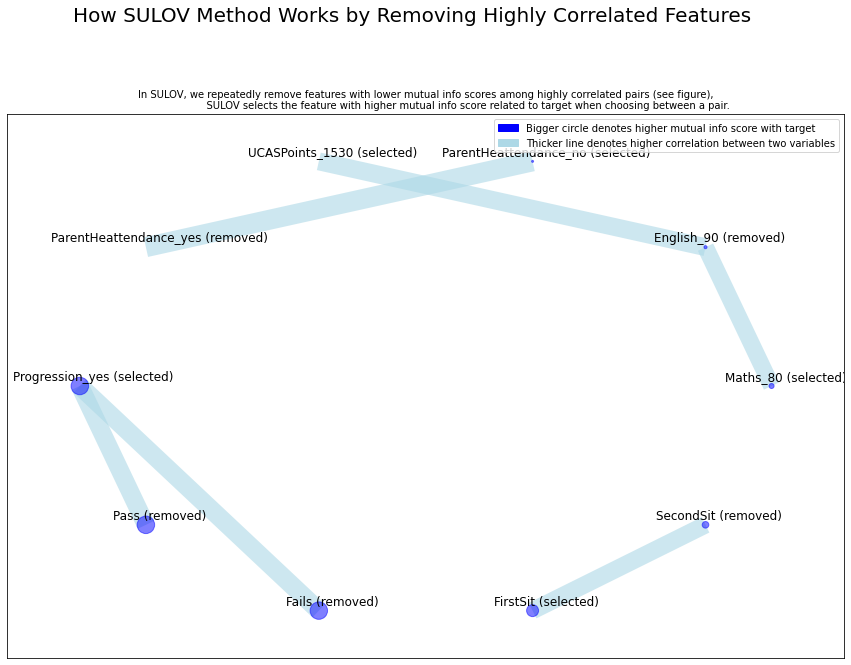

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 100
Final list of selected vars after SULOV = 100
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors = 100 
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 100 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 80 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 60 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 40 variables...
            

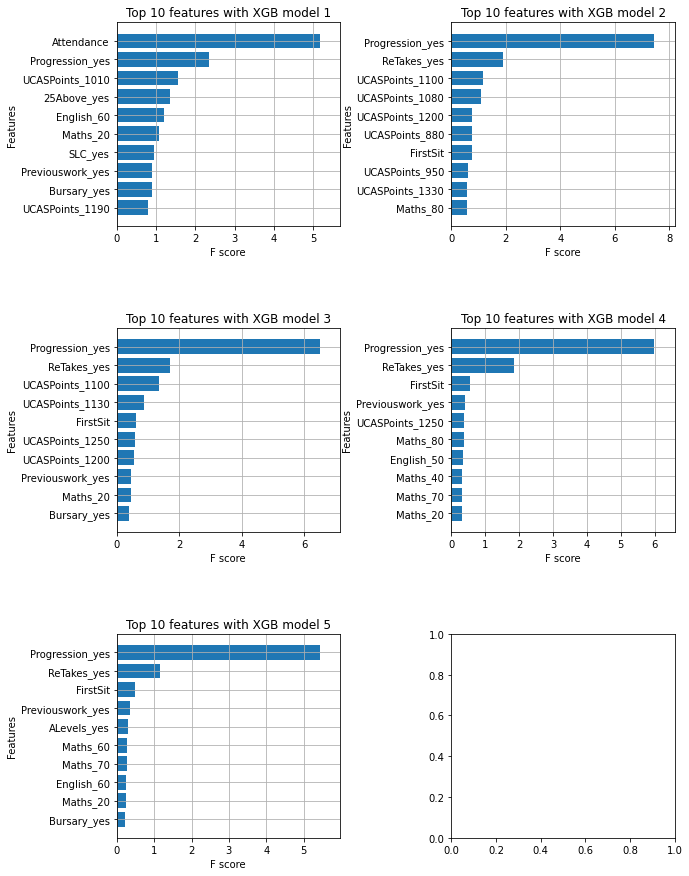

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 38 important features. Too many to print...
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 38 important features and a train dataframe


In [ ]:
from featurewiz import featurewiz

target = "desertion" 

features, data_full = featurewiz(data_train, target, corr_limit=0.8, verbose =2, sep=",", header= 0, test_data= 2, feature_engg= "", category_encoders="")

In [ ]:
data_full

,Attendance,Progression_yes,UCAS Points_101.0,25 Above_yes,English_6.0,Maths_2.0,SLC_yes,Previous work_yes,Bursary_yes,UCAS Points_119.0,...,English_5.0,UCAS Points_123.0,Maths_4.0,Maths_7.0,Btec_yes,A Levels_yes,Parent He attendance_no,Maths_5.0,English_7.0,desertion
0,0.693727,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-1.276930,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,-1.149791,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-1.721917,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,0.503018,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,-1.276930,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1029,-0.577665,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1030,-2.103334,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1031,-0.959082,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X= data_full.drop(["desertion"], axis = 1)
y= data_full['desertion']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 875, 1: 875})


In [ ]:
X_res.columns

Index(['Attendance', 'Progression_yes', 'UCAS Points_101.0', '25 Above_yes',
       'English_6.0', 'Maths_2.0', 'SLC_yes', 'Previous work_yes',
       'Bursary_yes', 'UCAS Points_119.0', 'Ethnicity_1', 'Polar_4_Score',
       'UCAS Points_98.0', 'Maths_3.0', 'UCAS Points_133.0', 'Re Takes_yes',
       'UCAS Points_110.0', 'UCAS Points_108.0', 'UCAS Points_120.0',
       'UCAS Points_88.0', 'First Sit', 'UCAS Points_95.0', 'Maths_8.0',
       'UCAS Points_93.0', 'UCAS Points_107.0', 'UCAS Points_113.0',
       'UCAS Points_125.0', 'Maths_6.0', 'UCAS Points_104.0', 'English_5.0',
       'UCAS Points_123.0', 'Maths_4.0', 'Maths_7.0', 'Btec_yes',
       'A Levels_yes', 'Parent He attendance_no', 'Maths_5.0', 'English_7.0'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components=0.9)

x_f= pca.fit_transform(X_res)
pca.explained_variance_ratio_

array([0.30086048, 0.16011139, 0.11543413, 0.05955072, 0.05268795,
       0.03898444, 0.03386734, 0.02790557, 0.02539454, 0.02236497,
       0.02116579, 0.01784746, 0.01716411, 0.0153433 ])

In [ ]:
#from sklearn.preprocessing import Normalizer

#nmz = Normalizer()
#x_final= nmz.fit_transform(x_f)

In [ ]:
x_final= x_f

# *Fin del pipeline 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_final, y_res, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(1225, 14)

In [ ]:
Counter(y_test)

Counter({1: 261, 0: 264})

# Probando los modelos 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       264
           1       0.96      0.99      0.97       261

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [ ]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [ ]:
lr.score(X_train, y_train)

0.9330612244897959

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       264
           1       0.93      0.94      0.94       261

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred= gnb.predict(X_test)

In [ ]:
gnb.score(X_train, y_train)

0.9053061224489796

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       264
           1       0.92      0.92      0.92       261

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboc= GradientBoostingClassifier()
gboc.fit(X_train, y_train)
y_pred= gnb.predict(X_test)

In [ ]:
gboc.score(X_train, y_train)

0.9983673469387755

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       264
           1       0.92      0.92      0.92       261

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x_final, y_res, cv=10).mean()

0.9714285714285713

In [ ]:
cross_val_score(lr, x_final, y_res, cv=10).mean()

0.9291428571428572

In [ ]:
cross_val_score(gnb, x_final, y_res, cv=10).mean()

0.9085714285714287

In [ ]:
cross_val_score(gboc, x_final, y_res, cv=10).mean()

0.9571428571428573